<a href="https://colab.research.google.com/github/ismailali121/Airbnb-EDA-Capstone-Project/blob/main/airbnb_booking_analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Booking Analysis



##### **Project Type**    - Python/Exploratory Data Analysis
##### **Contribution**    - Individual


# **Project Summary**

In this Project we will be performing Exploratory Data Analysis on New York City Airbnb 2019 dataset. We will be diving deep into the datset and explore variations of different fields with respect to different Neighbourhood groups (locations) and different Neighbourhoods (Areas) of New York City. We will also analyze various insights and understand key factors behind those insights.

To Achieve insight over the data we will divide the operations into below parts:

1. **Data Analysis** - Investigating the dataset, shape and structure of data,understanding the pattern of data.


2. **Data Cleaning** - In this we will be checking for any discripancies presents in data and perform below operations

    * **Duplicate data reduction** - Finding and removing if any duplicate data.

    * **Null Value Processing** - Cleaning up unwanted null values, rows and columns.


3. **Data Wrangling** - Creating new columns and Converting data to relevant structure and prepare dataset for visualization.


4. **Data Visualization** - Get a deep visualization on cleaned data for better analysis.

# **GitHub Link -**

https://github.com/ismailali121/Airbnb-EDA-Capstone-Project

# **Problem Statement**



**Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data data that can be analysed and used for security, business decisions, understanding of customers' and providers (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**

**This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.**

**Explore and analyse the data to discover key understandings.**

#### **Business Objective**

To analyze the dataset and draw meaning full insights on how different key features such as price,number of reviews and minimum nights vary with respect to different neighbourhood groups, neighbouhoods and room types. Provide suggestions on how to increase profits of the company in future.

## **Getting the Data and Importing Libraries**

### Import Libraries

In [37]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [38]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 1 - Python for Data Science/EDA Project AirBnb Booking Analysis/Airbnb NYC 2019.csv')

## **Lets have a look of complete Dataset !!**

In [40]:
# Showing the first five rows of our dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [41]:
# Checking the size of our dataset
df.shape

(48895, 16)

Our data has 16 columns and 48895 rows at present

### Dataset Information

In [42]:
# Getting basic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## **Cleaning the Dataset**

#### Duplicate Values

In [43]:
# Checking if there are any duplicates in our dataset
df[df.duplicated()].count()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

As we can see from above, There are No duplicates in our dataset

#### Missing Values/Null Values

In [44]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are **10052** null values in last_review and reviews_per_month.

Lets replace reviews_per_month with 0 as It might be possible that these Stays might not have been rated at all.

last_review is a date field and replacing this with any random date would corrupt the dataset.

In [45]:
# Handling Null values
df.fillna({'reviews_per_month':0},inplace=True)

In [46]:
# Rechecking the null values
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## **Understanding Variables**

In [47]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [48]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The Minimum price cannot be zero. This might be duw to human error. So, lets drop rows with price as zero.

In [49]:
# Dropping the rows with price values zero.
df.drop(df[df.price==0].index,inplace=True)

In [50]:
# Rechecking the dataset describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 


1.   **id** - Unique id of listing

2.   **name** - Name of the listing

3.   **host_id** - Unique id of host

4.   **host_name** - Name of the host

5.   **neighbourhood_group** - Location of the listing

6.   **neighbourhood** - Area of the listing

7.   **latitude** - Latitude of listing

8.   **longitude** - Longitude of listing

9.   **room_type** - Type of rooms

10.  **price** - Price of listing

11.  **minimum_nights** - Minumum number of nights to be paid for

12.  **number_of_reviews** - Number of reviews given for the listing

13.  **last_review** - Date of the last review given to the listing

14.  **reviews_per_month** - No.of review given per month

15.  **calculated_host_listings_count** - Total number of listings for host

16.  **availability_365** - Number of days listing is available




# **Data Wrangling and Visulaization**

In [51]:
# Having a look at dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Correlation of each field**

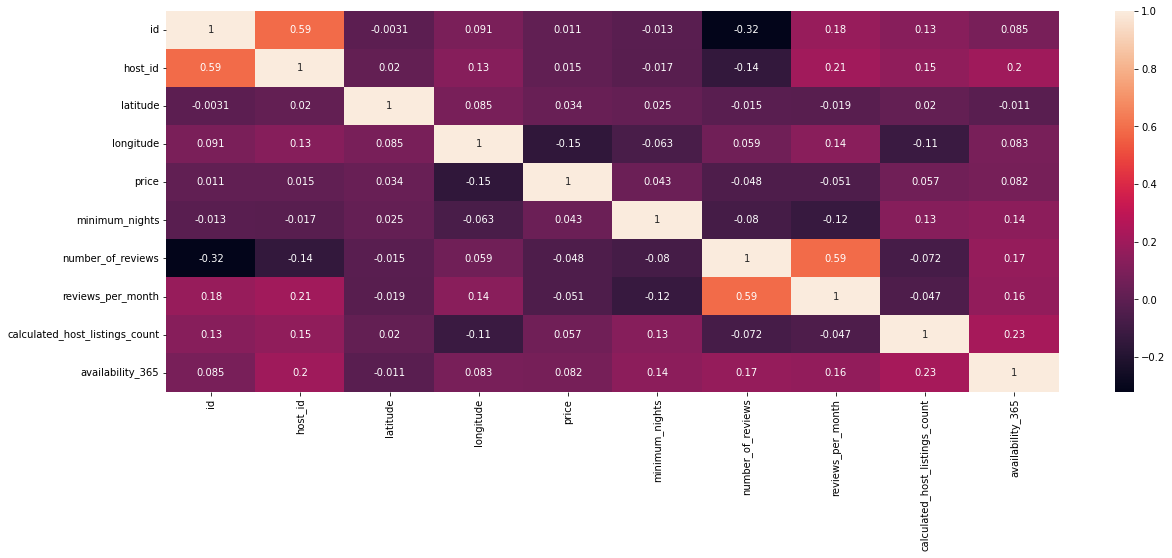

In [52]:
plt.figure(figsize=(20,7))
corr_=df.corr()
sns.heatmap(corr_,annot=True)

From the above heat map we can conclude that there is no correation between any fields

# **Number of properties in each Neighbourhood Group**

Text(0.5, 1.0, 'Number of properties in each Neighbourhood Group')

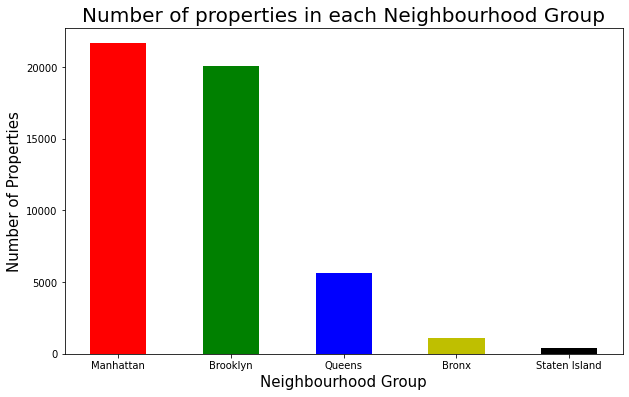

In [53]:
# Finding the number of properties in each neighbourhood group using graph
prop_count=df['neighbourhood_group'].value_counts().reset_index()

plt.figure(figsize=(10,6))

plt.bar(prop_count['index'],prop_count['neighbourhood_group'],0.5,color=['r','g','b','y','k'])

plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Properties',size=15)
plt.title('Number of properties in each Neighbourhood Group',size=20)

It can be understood from above graph that most number of properties are present in **Manhattan**

# **Number of Reviews in each Neighbourhood group**

Text(0.5, 1.0, 'Number of Reviews in each Neighbourhood Group')

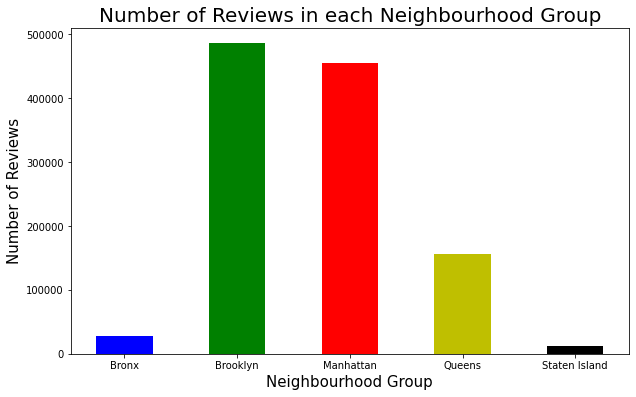

In [54]:
# Finding the number of reviews in each neighbourhood group using graph
reviews_count=df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
reviews_count
plt.figure(figsize=(10,6))

plt.bar(reviews_count['neighbourhood_group'],reviews_count['number_of_reviews'],0.5,color=['b','g','r','y','k'])

plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Reviews',size=15)
plt.title('Number of Reviews in each Neighbourhood Group',size=20)

**Brooklyn and Manhattan are the Most reviewed Neighbourhood Groups, where as Bronx and Staten Island are least**

It can also be infered that if number of reviews are more, it means more people must be visiting the properties in these neighbourhood groups.

So **Brooklyn** and **Manhattan** must be the Most Busiest Neighbourhood Groups.

# **Number of Properties by Room Type**

Text(0.5, -0.1, 'Number of Properties by Room Type')

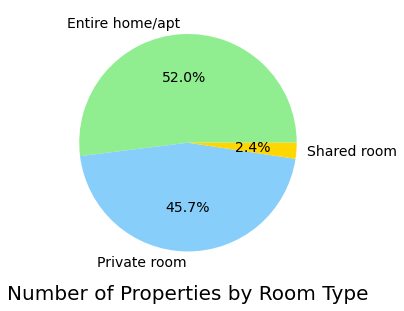

In [55]:
count_by_roomtype=df.groupby('room_type')['host_id'].count().reset_index()
count_by_roomtype
plt.figure(figsize=(5,5))

plt.pie(count_by_roomtype['host_id'],labels=count_by_roomtype['room_type'],colors=['lightgreen','lightskyblue','gold'],textprops={'fontsize': 14},autopct='%1.1f%%')

plt.title('Number of Properties by Room Type',y=-0.1,size=20)

From the above chart it can be observed that, Most Properties offer **Entire home or apartment** 

# **Minimun Nights offered by different Properties**

In [56]:
# Function to Categorize minimum_nights
def minimum_nights_cat(min_nights):
  if min_nights==1:
    return '1 Day'
  elif min_nights>1 and min_nights<7:
    return 'Less than a Week'
  elif min_nights==1:
    return '1 week'  
  elif min_nights>1 and min_nights<30:
    return 'Less than a Month'
  elif min_nights==30:
    return '1 Month'
  elif min_nights>30 and min_nights<180:
    return 'Less than 6 Months'
  elif min_nights==180:
    return '6 Months'
  elif min_nights>180 and min_nights<365:
    return 'Less than 1 Year'
  elif min_nights==365:
    return '1 Year'
  else:
    return 'More than 1 Year'

df['minimum_nights_category']=df['minimum_nights'].apply(lambda x: minimum_nights_cat(x))

Text(0.5, 1.0, 'Minimun Nights Category')

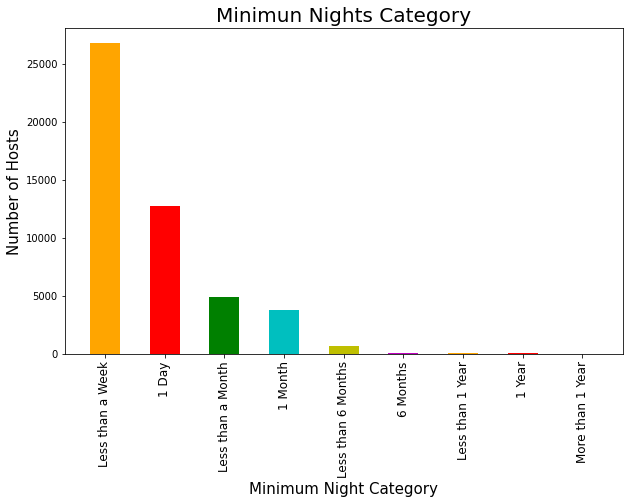

In [57]:
#Categorizing the minimum_nights into few segments
min_nights_category_df=df.groupby('minimum_nights_category')['host_id'].count().sort_values(ascending=False).reset_index()
min_nights_category_df

plt.figure(figsize=(10,6))
plt.bar(min_nights_category_df['minimum_nights_category'],min_nights_category_df['host_id'],0.5,color=['orange','r','g','c','y','m'])

plt.xlabel('Minimum Night Category',size=15)
plt.ylabel('Number of Hosts',size=15)
plt.xticks(rotation=90,fontsize=12)
plt.title('Minimun Nights Category',size=20)

We can say that, Most Hosts pefer minimum nights to be paid for **Less than a Week** or **1 day**

# **Which Month most people checked out of the properties in 2019?**

This datset contains data of year 2019. Mostly people give reviews during their checkout from property.

Last_review can be inferred as the date when customer left the property.

Text(0.5, 1.0, 'Last Review date month wise')

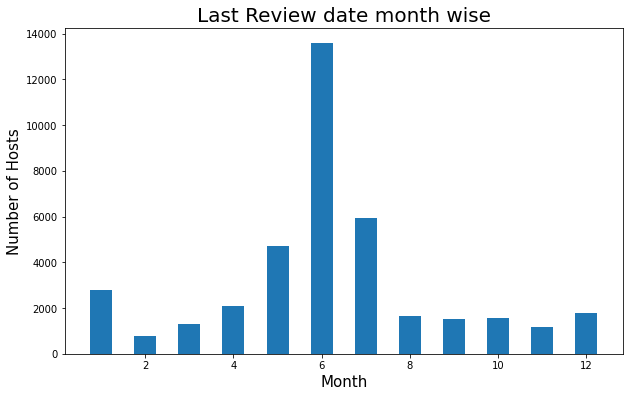

In [58]:
# Getting month from last_review date
df['last_review']=pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df['last_review_month']=df['last_review'].apply(lambda x: x.month)

last_month=df.groupby('last_review_month')['host_id'].count().reset_index()

plt.figure(figsize=(10,6))
plt.bar(last_month['last_review_month'],last_month['host_id'],0.5)

plt.xlabel('Month',size=15)
plt.ylabel('Number of Hosts',size=15)
# plt.xticks(rotation=90,fontsize=12)
plt.title('Last Review date month wise',size=20)

It can be observed that in the year 2019, Most people checked out/changed there Stay in the **6th month** (June Month)

# **Comparision of Demand and Supply of Hosts in each Neighbourhood Group**

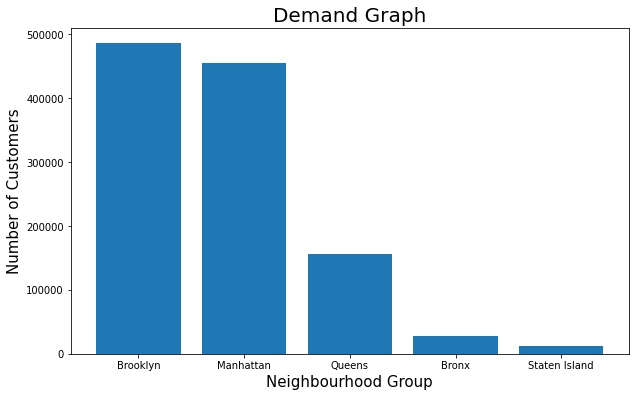

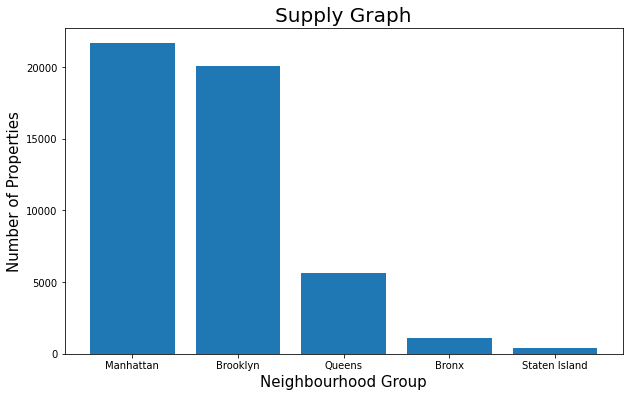

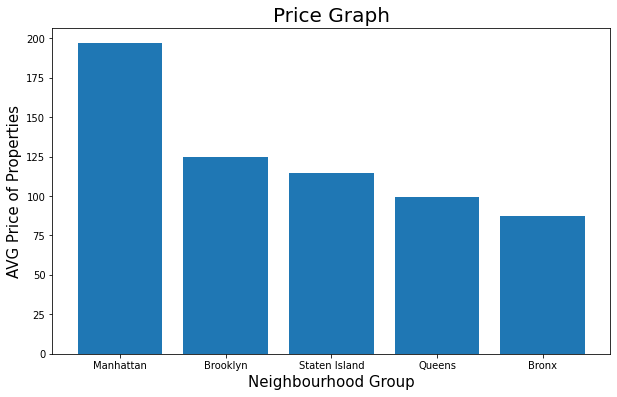

In [59]:
# number_of_reviews gives us the count of people stayed in that Neighbourhood Group
demand_df=df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False).reset_index()

# number of hosts in a Neighbourhood Group will tell us about the supply in that Neighbourhood Group
supply_df=df.groupby('neighbourhood_group')['host_id'].count().sort_values(ascending=False).reset_index()

# calculating the avg price in each Neighbourhood Group
avg_price_df=df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (10, 6)

# Demand Graph
plt.bar(demand_df['neighbourhood_group'],demand_df['number_of_reviews'])
plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Customers',size=15)
plt.title('Demand Graph',size=20)
plt.show()

# Supply Graph
plt.bar(supply_df['neighbourhood_group'],supply_df['host_id'])
plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Properties',size=15)
plt.title('Supply Graph',size=20)
plt.show()

# Price Graph
plt.bar(avg_price_df['neighbourhood_group'],avg_price_df['price'])
plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('AVG Price of Properties',size=15)
plt.title('Price Graph',size=20)
plt.show()

The Highest number of customers are in **Brooklyn**, But the Highest number of Properties are present in **Manhattan**.

So it can be suggested to Increase the number of properties in **Brooklyn** to increase profits as there is **High Demand**.

# **Number of Properties by Room Type in each Neighbourhood Group**

Text(0.5, 1.0, 'Properties by Room Type in each Neighbourhood Group')

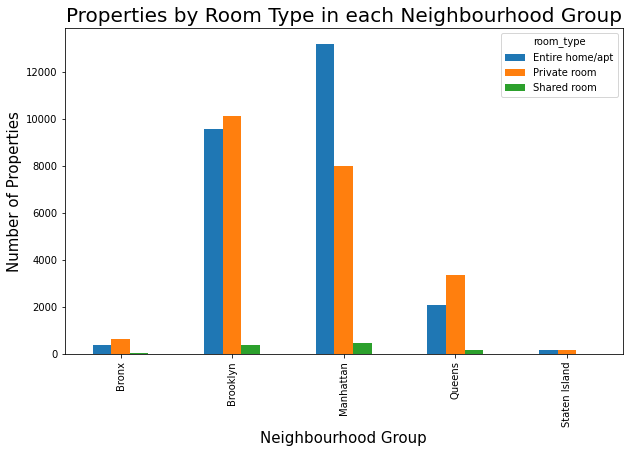

In [60]:
# Grouping hosts by both neighbourhood_group and room_type
types_by_neighbourhood=df.groupby(['neighbourhood_group','room_type'])['host_id'].count().unstack()

types_by_neighbourhood.plot.bar()
plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Properties',size=15)
plt.title('Properties by Room Type in each Neighbourhood Group',size=20)

From the above plot we can conclude that **Manhattan** and **Brooklyn** have the highest number of Entire home/apt Type of properties. This can be due to more number of families travelling to these places, they mignt want the entire home to themselves.

There are very few **shared rooms** in almost all Neighbourhood groups. 

# **Lets dive futher into dataset and explore all Neighbourhoods in each Neighbourhood Group !!**

In [61]:
# This function will give subset of inputed "Neighbourhood Groups" all "Neighbourhoods"
def get_neighbourhoods(n_grp):
  ng_df=df[df['neighbourhood_group']==n_grp]
  neighbourhoods_count=ng_df['neighbourhood'].value_counts().reset_index()
  nh1=ng_df[ng_df['neighbourhood']==neighbourhoods_count['index'][0]]
  nh2=ng_df[ng_df['neighbourhood']==neighbourhoods_count['index'][1]]
  nh3=ng_df[ng_df['neighbourhood']==neighbourhoods_count['index'][2]]
  nh4=ng_df[ng_df['neighbourhood']==neighbourhoods_count['index'][3]]
  nh5=ng_df[ng_df['neighbourhood']==neighbourhoods_count['index'][4]]
  final_df=pd.concat([nh1,nh2,nh3,nh4,nh5])
  return final_df

#This function will further subset the inputed "room_type" from all "Neighbourhoods"
def get_roomtype(room_type,neighbourhood_group):
  ng_subset=get_neighbourhoods(neighbourhood_group)
  result=ng_subset[ng_subset['room_type']==room_type]
  return result

# This function will take neighbourhood_group and variable as input. It will return a plot of neighbourhood_group vs variable
def plot_graph(neighbourhood_group,variable):
  # Getting the subset of neighbourhood_group
  private_room_df=get_roomtype('Private room',neighbourhood_group)
  entire_room_df=get_roomtype('Entire home/apt',neighbourhood_group)
  shared_room_df=get_roomtype('Shared room',neighbourhood_group)

  # Grouping by neighbourhood and aggregating the mean of variable
  pvt_df=private_room_df.groupby('neighbourhood')[variable].mean().reset_index().rename({variable: 'Private Room'}, axis=1)
  en_df=entire_room_df.groupby('neighbourhood')[variable].mean().reset_index().rename({variable: 'Entire home/apt'}, axis=1)
  sr_df=shared_room_df.groupby('neighbourhood')[variable].mean().reset_index().rename({variable: 'Shared room'}, axis=1)

  # Joining all room_types aggregated values
  final=pd.concat([pvt_df.set_index('neighbourhood'),en_df.set_index('neighbourhood'),sr_df.set_index('neighbourhood')], axis=1, join='outer').reset_index()
  final_plot=final.set_index('neighbourhood').plot.bar(fontsize='12')
  final_plot.set_xlabel('Neighbourhood',size=15)
  final_plot.set_ylabel(variable,size=15)
  final_plot.set_title(label='Neighbourhood'+' vs '+variable, size=15)
  return final_plot

### **Neighbourhoods in Manhattan**

**Variation in prices of each Neighbourhood of Manhattan by Room Type**

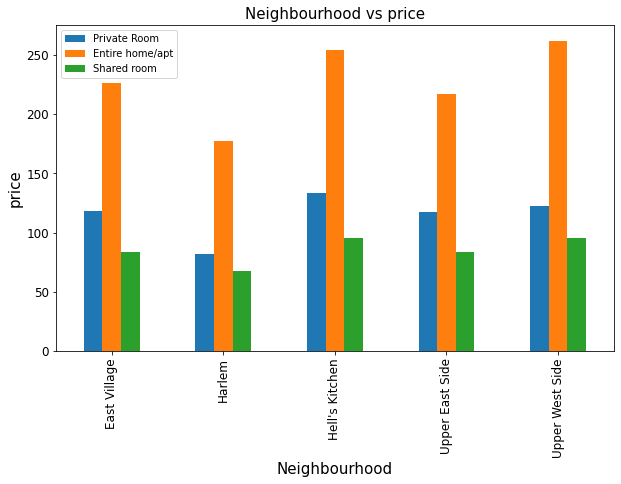

In [62]:
plot_graph('Manhattan','price')

From the above plot we can say that **Hell's Kitchen** and **Upper West side** Neighbourhoods in Manhattan have Highest Average Price. This might be due to availability of good amenities in these areas.

**Variation in number_of_reviews of each Neighbourhood of Manhattan by Room Type**

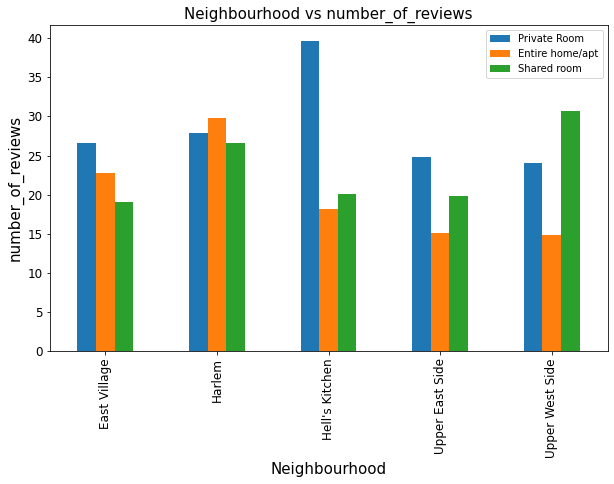

In [63]:
plot_graph('Manhattan','number_of_reviews')

From the above plot we can observe that **Hell's Kitchen** Neighbourhood has the highest number of reviews for **Private room** Type of Properties.

### **Neighbourhoods in Brooklyn**

**Variation in prices of each Neighbourhood of Brooklyn by Room Type**

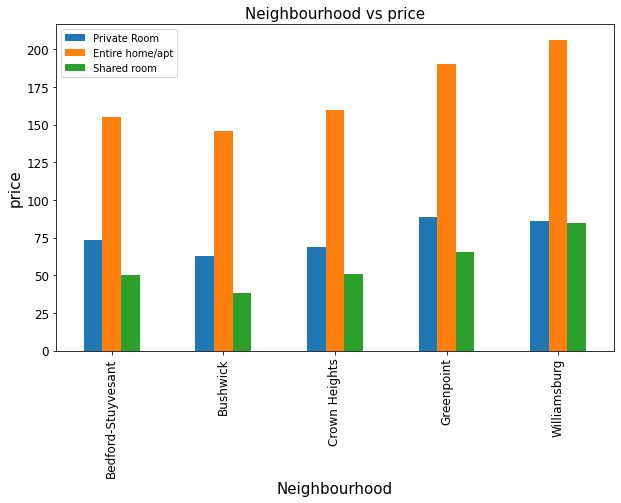

In [64]:
plot_graph('Brooklyn','price')

From above plot we can conclude that for each room type Williamsburg have highest average price and for each room type price is varying according to neighbourhood.

**Variation in number_of_reviews of each Neighbourhood of Brooklyn by Room Type**

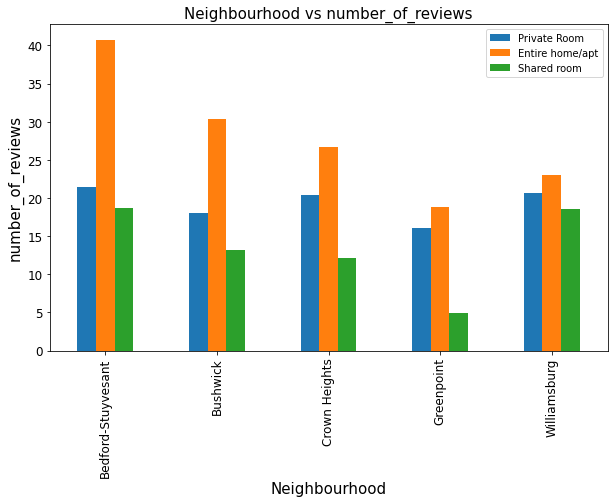

In [65]:
plot_graph('Brooklyn','number_of_reviews')

From the above plot we can see that most reviews are for the **Entire home/apt** type in Brooklyn.

Williamsburg has the least reviews for Entire home/apt type, This might be because of the highest average prices.

### **Neighbourhoods in Queens**

**Variation in prices of each Neighbourhood of Queens by Room Type**

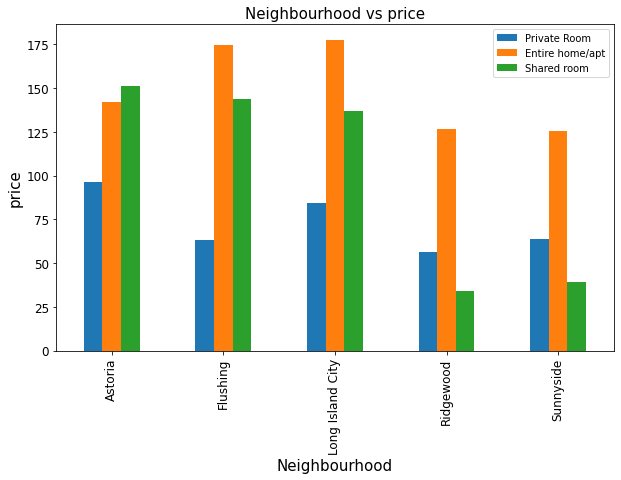

In [66]:
plot_graph('Queens','price')

The Maximum price in Queens is very less compared to Manhattan and Brooklyn. This might be due to less demand in this area.

**Variation in number_of_reviews of each Neighbourhood of Queens by Room Type**

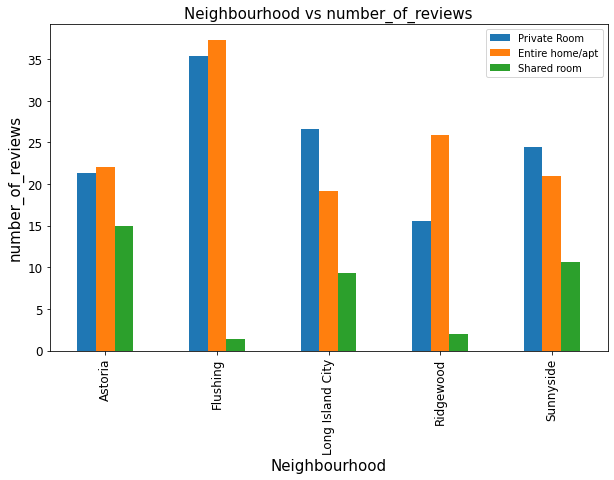

In [67]:
plot_graph('Queens','number_of_reviews')

**Private Room** Type in the **Flushing** Neighbourhood has highest reviews compared to other Neighbourhoods. This is because of low average price for Private rooms in this area.

### **Neighbourhoods in Bronx**

**Variation in prices of each Neighbourhood of Bronx by Room Type**

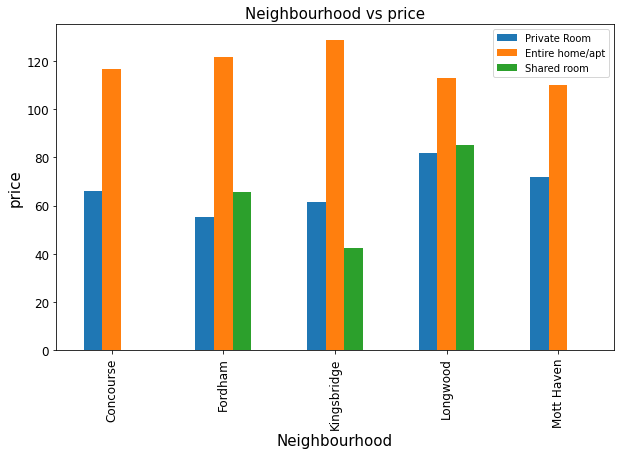

In [68]:
plot_graph('Bronx','price')

From the above plot we can say that the prices for **Entire home/apt** Type are high in almost all Neighbourhoods in Bronx.

Prices are even more lower than Queens. Might be due even lesser demand in these neighbourhoods

**Variation in number_of_reviews of each Neighbourhood of Bronx by Room Type**

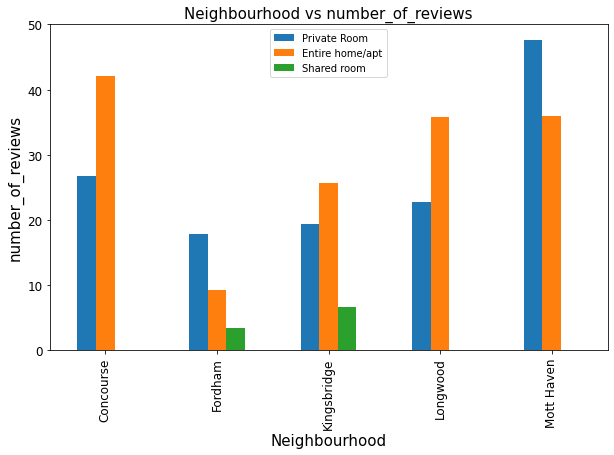

In [69]:
plot_graph('Bronx','number_of_reviews')

Almost all the reviews are for **Entire home/apt** or **Private Room** type. This can be due to low average prices people are prefering Entire home or Private Room types only

### **Neighbourhoods in Staten Island**

**Variation in prices of each Neighbourhood of Staten Island by Room Type**

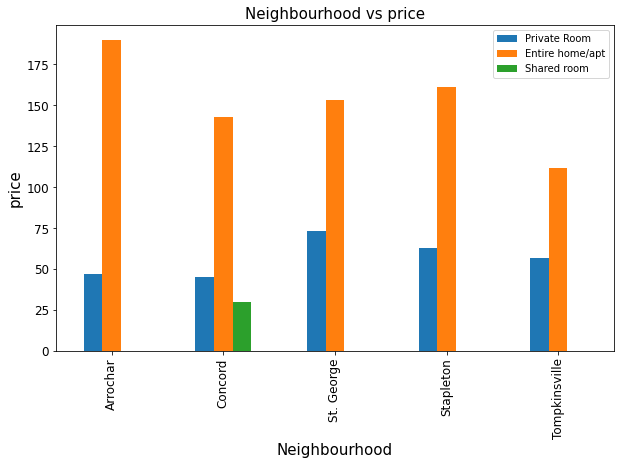

In [70]:
plot_graph('Staten Island','price')

From the above plot we can observe that except **Concord** Neighbourhood, there are no **shared rooms** in any other Neighbourhoods

**Variation in number_of_reviews of each Neighbourhood of Staten Island by Room Type**

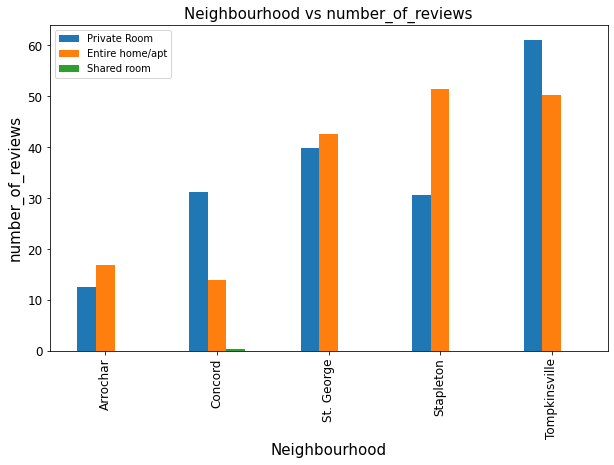

In [71]:
plot_graph('Staten Island','number_of_reviews')

**Tompkinsville** has the highest number of reviews. This might be because of lower prices.

# **Overview of all Airbnb Properties in NYC**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


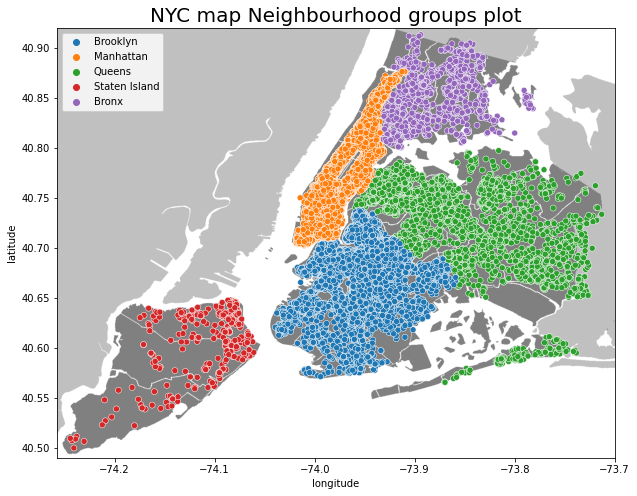

In [72]:
# import library to read image from URL
import urllib

plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

# Plotting Neighbourhood Groups using scatterplot on NYC Map
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)

plt.title('NYC map Neighbourhood groups plot',size=20)
plt.legend()
plt.show()

The above scatter plot on NYC map gives us an Overview of all the AirBnb listings located in NYC

# **Conclusion**

From the above analysis, we can conclude that

*  Highest number of properties are in Manhattan or Brooklyn Neighbourhood group. Where as least properties are in Staten Island

*   Most people prefer to stay in Brooklyn or Manhattan Neighbourhood group. Where as least people pefer staying in Staten Island

*   Most people are prefering Entire home/apt followed by Private room and least is Shared room 

*   Many Hosts pefer minimum nights to be paid for Less than a Week or 1 day

*   Based on last review, we can say that most people have left/changed the property in June 2019

*   The highest number of Customers are in Brooklyn followed by Manhattan.The highest number of properties are in Manhattan followed by Brooklyn. So it can be suggested to increase the number of properties in Brooklyn to get increased Profits

*  Manhattan has the Highest average price for properties followed by Brooklyn

*  Manhattan and Brooklyn have the highest number of Entire home/apt Type of properties. This can be due to more number of families travelling to these places

*  There are very few shared rooms in almost all Neighbourhood groups.

*   Hell's Kitchen and Upper West side Neighbourhoods in Manhattan have Highest Average Price. This might be due to availability of good amenities in these areas.

*  Hell's Kitchen Neighbourhood in Manhattan has the highest number of reviews for Private room Type of Properties.

*  Williamsburg Neighbourhood in Brooklyn has the highest average price for Entire home/apt and other types as well.

*  Unlike Manhattan the highest number of reviews in Brooklyn are for Entire home/apt type in almost all Neighbourhoods.

*  The Maximum price in Queens is very less compared to Manhattan and Brooklyn. This might be due to less demand in this area.

*  Private Room Type in the Flushing Neighbourhood of Queens has highest reviews compared to other Neighbourhoods. This is because of low average price for Private rooms in this area.

*  In Bronx Neighboughood group Prices for Entire home/apt Type are high in almost all Neighbourhoods.

*  Most reviews in Bronx are for Entire home/apt or Private Room type.This can be due to low average prices people are prefering these two Room types only

*  In Staten Island, There are no shared rooms in all Neighbourhoods except Concord Neighbourhood.

* Tompkinsville Neighbouhood in Staten Island has the highest number of reviews. This might be because of lower prices.



